In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, InputLayer
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping
from tensorflow.keras.datasets import mnist
import time
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [5]:
# import dataset from keras
(x_train, y_train), (x_val, y_val) = mnist.load_data()

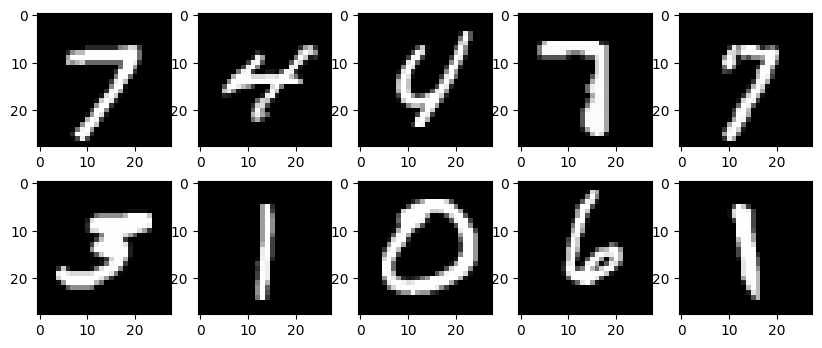

In [22]:
num_samples = 10
indices = np.random.choice(len(x_train), num_samples, replace=False)
sample_images = iter(x_train[indices])
sample_labels = x_train[indices]

# Plot the selected samples
fig, axes = plt.subplots(2, 5, figsize=(10, 4))

for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        axes[i][j].imshow(next(sample_images))
    

In [ ]:
# convert to RGB (3 channels)
x_train = np.stack((x_train,)*3, axis=-1)
x_val = np.stack((x_val,)*3, axis=-1)

# normalize image in scale (0-1)
x_train = x_train / 255.0
x_val = x_val / 255.0

In [10]:
# define model architecture

model = Sequential([
    InputLayer(input_shape=(28, 28, 3)),
    Conv2D(32, (3, 3), activation='relu', padding = 'same'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding = 'same'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding = 'same'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# define callbacks
tensorboard = TensorBoard(log_dir="logs/{}".format(time.time()))

checkpoint = ModelCheckpoint('./Checkpoints/model-{epoch:03d}.h5', 
                              monitor='val_loss', 
                              verbose=1, 
                              save_best_only=True, 
                              mode='auto', save_weights_only=False)

earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0.01,
                          patience=5,
                          verbose=1, mode='auto')

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [9]:
model.fit(x_train, y_train, epochs=20, batch_size=128, 
          validation_data=(x_val, y_val), 
          callbacks=[tensorboard, checkpoint, earlystop])

Epoch 1/20
469/469 [==============================] - ETA: 0s - loss: 0.1765 - accuracy: 0.9461
Epoch 1: val_loss improved from inf to 0.04047, saving model to ./Checkpoints\model-001.h5
469/469 [==============================] - 64s 134ms/step - loss: 0.1765 - accuracy: 0.9461 - val_loss: 0.0405 - val_accuracy: 0.9863
Epoch 2/20
469/469 [==============================] - ETA: 0s - loss: 0.0443 - accuracy: 0.9862
Epoch 2: val_loss improved from 0.04047 to 0.03223, saving model to ./Checkpoints\model-002.h5
469/469 [==============================] - 60s 127ms/step - loss: 0.0443 - accuracy: 0.9862 - val_loss: 0.0322 - val_accuracy: 0.9896
Epoch 3/20
469/469 [==============================] - ETA: 0s - loss: 0.0313 - accuracy: 0.9901
Epoch 3: val_loss improved from 0.03223 to 0.02656, saving model to ./Checkpoints\model-003.h5
469/469 [==============================] - 64s 135ms/step - loss: 0.0313 - accuracy: 0.9901 - val_loss: 0.0266 - val_accuracy: 0.9901
Epoch 4/20
469/469 [=========

KeyboardInterrupt: 

In [24]:
model.save("model.h5")